## Predicting house prices with linear regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
houses_df = pd.read_csv('housing_price_regression.csv')

### Dataset consists of 2051 homes and initially had 80 features (up to 278 from dummy variables)
##### I cleaned the dataset beforehand

In [3]:
houses_df.head()

,Id,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,target
0,109,533352170,0.0,13517,6,8,1976,2005,289.0,533.0,...,0,0,0,0,0,0,0,0,1,130500
1,544,531379050,43.0,11492,7,5,1996,1997,132.0,637.0,...,0,0,0,0,0,0,0,0,1,220000
2,153,535304180,68.0,7922,5,7,1953,2007,0.0,731.0,...,0,0,0,0,0,0,0,0,1,109000
3,318,916386060,73.0,9802,5,5,2006,2007,0.0,0.0,...,0,0,0,0,0,0,0,0,1,174000
4,255,906425045,82.0,14235,6,8,1900,1993,0.0,0.0,...,0,0,0,0,0,0,0,0,1,138500


In [4]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Columns: 279 entries, Id to target
dtypes: float64(25), int64(254)
memory usage: 4.4 MB


In [5]:
houses_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2198.0,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,907180080.0,924152030.0
Lot Frontage,2051.0,5.794442e+01,3.313733e+01,0.0,43.5,63.0,78.0,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,11513.5,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.0,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.0,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2001.0,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2004.0,2010.0
Mas Vnr Area,2051.0,9.862652e+01,1.743247e+02,0.0,0.0,0.0,159.0,1600.0
BsmtFin SF 1,2051.0,4.420848e+02,4.611950e+02,0.0,0.0,368.0,733.5,5644.0


### Target is price

In [6]:
houses_df['SalePrice']

0       130500
1       220000
2       109000
3       174000
4       138500
5       190000
6       140000
7       142000
8       112500
9       135000
10       85400
11      183600
12      131000
13      200000
14      193000
15      173500
16       98000
17      139000
18      143500
19      215200
20      129000
21      278000
22      344133
23      185000
24      145000
25      187500
26      138500
27      198000
28      119600
29      122900
         ...  
2021    195800
2022    223000
2023    192000
2024    197000
2025    298236
2026    238000
2027    119000
2028    262500
2029    425000
2030    102776
2031    149900
2032    190000
2033    162500
2034    217000
2035    137500
2036    270000
2037    142500
2038    161000
2039     93900
2040    225000
2041    412500
2042     83000
2043    128000
2044    182000
2045    394617
2046    298751
2047     82500
2048    177000
2049    144000
2050    189000
Name: SalePrice, Length: 2051, dtype: int64

In [7]:
y = houses_df['SalePrice']
X = houses_df.drop(columns=['SalePrice', 'target'])

### Train/test split - this should technically be done before data cleaning and manipulation!

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .25)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1538, 277), (1538,), (513, 277), (513,))

### Running a simple linear model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
linreg = LinearRegression()

In [13]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
linreg.score(X_train, y_train)

0.9461962541415644

In [15]:
linreg.score(X_test, y_test)

0.9161109817487165

In [ ]:
predictions = linreg.predict()

In [16]:
def adjusted_r_suared(r_squared, num_samples, num_regressors):
    return 1 - ((1-r_squared)*(num_samples - 1) / (num_samples - num_regressors - 1))

In [17]:
adjusted_r_suared(.9161109817487165, 513, 277)

0.817229032575927

#### Generating predictions to compare to actual prices

In [18]:
linreg_results_df = pd.DataFrame(linreg.predict(X_test), y_test).reset_index()

In [19]:
linreg_results_df.columns = ['Actual_Price', 'Predicted_Price']

In [20]:
linreg_results_df.head()

,Actual_Price,Predicted_Price
0,132500,130429.418828
1,226000,214393.707844
2,250000,306450.582455
3,128000,118340.425123
4,203160,203009.737674


### But what does the R^2 score really mean to most people (stakeholders, homebuyers, etc?) Let's get some results that can actually be communicated

In [21]:
from sklearn.metrics import mean_squared_error, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# RMSE

(mean_squared_error(linreg_results_df['Actual_Price'], linreg_results_df['Predicted_Price']) ** .5)

22695.388224579543

In [23]:
# Mean House Price

linreg_results_df['Actual_Price'].mean()

182692.03118908382

In [24]:
# Average prediction error per house (percentage)

((mean_squared_error(linreg_results_df['Actual_Price'], linreg_results_df['Predicted_Price']) ** .5) /
linreg_results_df['Actual_Price'].mean())

0.12422757619400551

In [25]:
# Median Absolute Error

median_absolute_error(linreg_results_df['Actual_Price'], linreg_results_df['Predicted_Price'])

10680.691858152393

In [26]:
#Median House Price

linreg_results_df['Actual_Price'].median()

163000.0

In [27]:
# Average error from median (percentage)

(median_absolute_error(linreg_results_df['Actual_Price'], linreg_results_df['Predicted_Price']) /
linreg_results_df['Actual_Price'].median())

0.06552571692118032

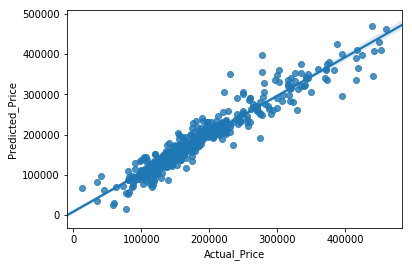

In [28]:
sns.regplot(linreg_results_df['Actual_Price'], linreg_results_df['Predicted_Price'])

### Let's use regularization

In [29]:
from sklearn.linear_model import LassoCV, RidgeCV

### Lasso Regularizer

In [30]:
lasso = LassoCV(cv = 5)

In [31]:
lasso.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [32]:
lasso.score(X_train, y_train)

0.06898444385386371

In [33]:
lasso.score(X_test, y_test)

0.052083604402481054

#### Terrible R^2 - What happened here? We'll fix it later

In [34]:
pd.DataFrame(lasso.coef_, X.columns)

,0
Id,-0.000000
PID,-0.000111
Lot Frontage,0.000000
Lot Area,0.000000
Overall Qual,0.000000
Overall Cond,-0.000000
Year Built,0.000000
Year Remod/Add,0.000000
Mas Vnr Area,0.000000
BsmtFin SF 1,0.000000


### Ridge Regularizer

In [35]:
ridge = RidgeCV(cv = 5)

In [36]:
ridge.fit(X_train, y_train)

/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.61503e-21): result may not be accurate.
  overwrite_a=True).T
/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.59328e-21): result may not be accurate.
  overwrite_a=True).T
/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.40908e-21): result may not be accurate.
  overwrite_a=True).T
/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.59702e-21): result may not be accurate.
  overwrite_a=True).T
/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.75533e-21): result may not be ac

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [37]:
ridge.score(X_train, y_train)

0.9084024987452082

In [38]:
ridge.score(X_test, y_test)

0.9107831963501055

In [41]:
ridge_pred = ridge.predict(X_test)

In [43]:
median_absolute_error(y_test, ridge_pred)

11512.856606313959

In [39]:
ridge.coef_

array([-7.89369829e+00, -5.72404772e-07, -1.14768617e+01,  6.20954426e-01,
        1.00571587e+04,  4.64187093e+03,  2.76255494e+02,  9.37765356e+01,
        2.52208331e+01,  2.22300239e+00,  6.17130589e+00, -1.91570403e+00,
        6.47860405e+00,  7.70640066e+00,  1.54004434e+01,  4.28185209e+00,
        2.73886971e+01,  8.14636695e+03,  1.22599212e+03,  6.08248925e+03,
        4.59923637e+03, -9.49305662e+02, -1.02227839e+04,  2.53631029e+03,
        4.46045712e+03, -3.84680775e+00,  7.88645636e+03,  2.41592938e+00,
        1.53055668e+01,  4.13150173e+00,  1.46004568e+01,  4.13661845e+01,
        8.92197287e+01, -7.27072858e+01, -1.30210205e+01, -1.02215626e+02,
       -4.98566386e+03, -5.73315745e+03, -4.38351393e+03, -2.24559976e+02,
       -3.36753721e+03,  6.50504069e+03,  9.44671102e+03,  8.58767449e+02,
        4.85736924e+03,  4.03568873e+03,  1.15461780e+03,  5.27214973e+03,
        5.86964161e+03, -1.45194678e+03,  7.99055461e+02, -1.95011701e+03,
       -4.45284155e+03,  

#### This is actually performing worse than our original linear regression model! You don't always need to regularize!

### OK, let's fix our lasso

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
ss = StandardScaler()

In [46]:
X_train_sc = ss.fit_transform(X_train)

/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [47]:
X_test_sc = ss.transform(X_test)

/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [48]:
lasso.fit(X_train_sc, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [49]:
lasso.score(X_train_sc, y_train)

0.9105517930755569

In [50]:
lasso.score(X_test_sc, y_test)

0.9048054173227886

### Let's try logging our target data

In [51]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

#### Lasso

In [52]:
lasso.fit(X_train_sc, y_train_log)

/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [53]:
lasso.score(X_train_sc, y_train_log)

0.9181771628927036

In [54]:
lasso.score(X_test_sc, y_test_log)

0.8877731144679762

In [60]:
(lasso.coef_ == 0).sum()

188

#### Ridge

In [55]:
ridge.fit(X_train_sc, y_train_log)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [56]:
ridge.score(X_train_sc, y_train_log)

0.948843847390648

In [57]:
ridge.score(X_test_sc, y_test_log)

0.8881469323621647

### Let's see a case where regularization will clearly help

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .8)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((410, 277), (1641, 277), (410,), (1641,))

#### No Reg

In [63]:
linreg = LinearRegression()

In [64]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
linreg.score(X_train, y_train)

0.9602103527172609

In [66]:
linreg.score(X_test, y_test)

0.5855255022151783

#### L1 Reg

In [67]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/nicholasgayliard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [68]:
lasso.fit(X_train_sc, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [69]:
lasso.score(X_train_sc, y_train)

0.934493448564467

In [70]:
lasso.score(X_test_sc, y_test)

0.8134119271404712

#### L2 Reg

In [71]:
ridge.fit(X_train_sc, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [72]:
ridge.score(X_train_sc, y_train)

0.9557369060610366

In [73]:
ridge.score(X_test_sc, y_test)

0.7774089821483762